# Introduction

Welcome to NEUS642! Since I can be difficult to understand, most of what I'm saying will appear on the screen so you can follow along if needed. If I need to go off-script, the interpreter will repeat what I say after me. Please interrupt at any point during the class if you have trouble following along.

The course staff includes:

* Brad Buran (buran@ohsu.edu)
* Stephen David (davids@ohsu.edu)
* Alexandria Lassetter (lassetta@ohsu.edu)
* Emily Leff (leff@ohsu.edu)
* Alexander Tomlinson (tomlinsa@ohsu.edu)

Outside of class hours, all of us will be available via email and <a href="https://neus642.slack.com">Slack (NEUS642.slack.com)</a>. While you are welcome to email the course staff directly, we prefer that Python-related questions be posted to Slack. You may learn from our answers to questions posted by other students and are encouraged to answer each other's questions. During class, you are also encouraged to use Slack to discuss the exercises. Please share anything interesting you find with us on Slack or let us know if you'e confused about a particular topic.

**Before we move on, is everyone signed into Slack? To indicate you're on Slack, please go to the `#general` channel and post a reaction to the last message.**

We also have additional information in our class syllabus (https://bburan.github.io/NEUS642).

## How classes will work

Each week you or one of your classmates will lead an exercise on a data analysis problem relevant to neuroscience. Be sure that you provide sufficient background information at the beginning of the exercise for a neuroscientist to understand the problem. Throughout the exercise there will be points at which we stop for 5 to 15 minutes to give you the opportunity to write the solution for a particular question. You may work either individually or in groups.

You'll notice that we've provided you with both green and red post-it notes. If you need help during the class, stick the red post-it note on the back of your computer and someone will come help you. Once you've completed the exercise, please place the green post-it note on the back of your computer so we know when everyone's ready to move on.

## Developing an exercise

Although I will be running today's exercise, all subsequent exercises will be run by one of you. If you haven't already, please sign up for a slot. If preferred, you may work in small groups of two to three people. You are expected to be in regular contact with the course staff as you develop the exercise so that we can guide you and ensure the exercise is of appropriate scope and level for the class. Be sure to contact us early. You are expected to have a concept ready at least two weeks before your presentation slot and a full draft of the exercise complete a full week before your presentation slot. 

*Grading for registered students is based on your presentation, so you must sign up for a presentation if you're registered for the course.* 

# Today

## Getting started

There are many ways to run Python. For the course, we will be using Jupyter Notebook running on our personal laptops. Hopefully all of you had a chance to get your computer set up to run the notebooks. If not, please place a red post-it note on the back of your computer.

Now, let's download today's notebook. To make it easy to get future updates to the notebook, we are going to use Git, which is a source-code management tool. To get started, we will be using the command prompt. The command prompt is a program that allows you to interact with your computer using the keyboard instead of a mouse:

* Open `Anaconda Prompt`.
* Change to the directory where you want to store your files for NEUS642.
* Type `git clone https://github.com/bburan/NEUS642`

If the last step fails, it means you need to install git. While still in the `Anaconda Prompt`, type `conda install git`. Now, try the last step again. Once you have successfully run the last step, you will now have a folder called `NEUS642`. The next step is to make sure you have all the Python packages you need to run the code. If you followed the instructions in the syllabus, you should already have all the required packages. If not, type in the `Anaconda Prompt`:

```
conda install python matplotlib seaborn numpy pandas jupyter
```

You may not discover until later today that you are missing a package. If you discover this, just open up an `Anaconda Prompt` and run the above command.

Now, let's start Jupyter Notebook so we can see today's notebook. While still in the `Anaconda Prompt`:

* Change to the folder where you cloned the notebooks by typing `cd NEUS642`.
* Start Jupyter Notebook by typing `jupyter notebook`.

A web browser should immediately open and load Jupyter Notebook. Navigate to today's notebook (under `2020/200107`) and open `working with dataframes - students.ipynb`. You'll note that we have four versions of each notebook:

* `base` - This is the version you will create when authoring your own exercise. It contains all the answers to the exercises. The course staff has a script that will take this version and create three formatted versions of the notebook for use in the class. The formatted versions all contain a table of contents with links to easily navigate the notebook. Once you're ready to create the notebook for the class, the course staff will provide you instructions on how to properly format it so it works with the script.
* `students` - This is the version that you will use. The answers have been removed from the notebook so that you can enter your own solution.
* `teacher` - This is the version used by the presenter. The answers have been removed from the notebook, but will automatically be loaded once you execute the cell (note you will need to execute the cell twice, once to load the solution and again to run the solution).
* `answers` - Same as `base`, except it contains a nicely-formatted table of contents.

## Goals

Introduce the idea of a dataframe for managing experimental data in a tabular (spreadsheet) format. Demonstrate how programming using dataframes can simplify many common data operations, including:

1. Reshaping the data.
2. Merging two datasets on a common column or set of columns.
3. Grouping data and computing a statistic on the group.

Dataframes are provided using a Python library called [Pandas](https://pandas.pydata.org/). In the code I've imported pandas as `pd` for short. This two-letter abbreviation is a common convention in scientific Python programming (you'll often see numpy imported as `np` and scipy as `sp`). Since Pandas is a third-party library not included in the core Python distribution, you sometimes have to explicitly install it. It should already be installed if you . However, if you try to replicate the code using your own Python install, you may have to install Pandas using `conda install pandas`.

## The data

Noise exposure can cause hearing damage. Sometimes this damage is temporary, sometimes it is permanent. We can assess hearing thresholds in animals by measuring the auditory brainstem response (ABR). The ABR is an event-related potential reflecting the activity of the auditory nerve in response to a brief tone. By presenting tones of varying loudness (the unit is dB SPL), we can define the animal's hearing threshold as the minimum level (dB SPL) at which we can detect the ABR.

To assess hearing damage caused by noise exposure, we can measure ABR thresholds before noise-exposure, one day after noise-exposure and two weeks after noise-exposure. We have a set of animals that have been exposed to different levels of noise (104, 110 or 114 dB SPL). In this exercise, we will calculate and plot the mean threshold shift (i.e., the difference between post-exposure ABR threshold and pre-exposure ABR threshold).

The data is saved in two spreadsheets. The first contains the information on the noise-exposure for each animal and the second contains the ABR threshold measurements.

## Setting up the code

At the beginning of every Python script we need to import all the libraries we need and define a few variables. Due to how the notebooks are hosted on exajupyter, executing the first cell will typically be very slow (e.g., 30 seconds to a minute or two). However, once it has been executed the notebook should run very quickly. In future classes, please open up the notebook for the day and run the first cell as soon as you can. 

In [1]:
# This ensures that plots are shown below each code cell
%matplotlib inline

# Import the library we're using for this exercise
import pandas as pd

# For brevity, limit the number of rows displayed
pd.options.display.max_rows = 7

## A few pointers about Jupyer notebooks

Jupyter notebooks organize your code and text into a sequence of cells. Each cell can be run independently of each other. However, the order of execution matters. Take a look at the two cells below. Run the one named `Cell 1`. Why do we get an error?

Now, run `Cell 2` and then go back and run `Cell 1` again. Why does it work now?

What happens if we run `Cell 1` again? Why has the output changed?

In [4]:
# Cell 1
a = a * 2
print('A is now', a)

A is now 2


In [5]:
# Cell 2
a = 1

## Read in the data

Since Pandas provides a function for reading multiple file formats, including CSV (which can be generated by Excel using `save as`), reading in the exposure data is very simple.

In [6]:
exposure_data = pd.read_csv('exposure_data.csv')
exposure_data

,animal,exposure_date,exposure_level
0,Subject 1,2016-12-27,110
1,Subject 10,2017-04-24,114
2,Subject 11,2017-03-23,114
...,...,...,...
35,Subject 7,2017-05-09,114
36,Subject 8,2017-05-09,114
37,Subject 9,2017-05-09,114


This looks pretty good, but there's a bit of redundancy here. There's one row for each animal. The animals are numbered 1 through 38 as shown by the `animal` column. However, Pandas has automatically created an index indicating the row numbers. All dataframes have an index which uniquely identifies each row. By default, the index is just the row number. Note that the row-numbering starts at 0, which is a typical convention in Python. In some programming languages (e.g., Matlab), numbering typically starts at 1.

A dataframe index does not have to be a simple row number as long as the label for that row is unique. The label can be any immutable value (e.g., a string). Why not just use the animal ID as the index? Is there a way we can tell Pandas to use the `animal` column as the index? Perhaps the `read_csv` function has a parameter that allows you to specify this.  You can look up the documentation for any function in the IPython prompt by putting a question mark, `?`, after the name of the function:

    pd.read_csv?
   
Ok, now try it. What do you get?

In [7]:
# Answer
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: Union[str, pathlib.Path, IO[~AnyStr]],
    sep=',',
    delimiter=None,
    header='infer',
    names=None,
    index_col=None,
    usecols=None,
    squeeze=False,
    prefix=None,
    mangle_dupe_cols=True,
    dtype=None,
    engine=None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace=False,
    skiprows=None,
    skipfooter=0,
    nrows=None,
    na_values=None,
    keep_default_na=True,
    na_filter=True,
    verbose=False,
    skip_blank_lines=True,
    parse_dates=False,
    infer_datetime_format=False,
    keep_date_col=False,
    date_parser=None,
    dayfirst=False,
    cache_dates=True,
    iterator=False,
    chunksize=None,
    compression='infer',
    thousands=None,
    decimal=b'.',
    lineterminator=None,
    quotechar='"',
    quoting=0,
    doublequote=True,
    escapechar=None,
    comment=None,
    encoding=None,
    dialect=None,
    error_bad_lines=True,
    warn_bad_lines=T

### Exercise 1 - Specifying index labels

That's a lot of parameters for `read_csv`! Take a minute to read through the documentation. Does anything sound like it might let us specify what column to use as the index? Now, replace the `...` with the appropriate code to set the `animal` column as the index:

    exposure_data = pd.read_csv('exposure_data.csv', ...)
    exposure_data

Remember that Python uses a zero-based numbering scheme. That means that the first column has an index of 0 and the second column has an index of 1.

In [8]:
# Answer
exposure_data = pd.read_csv('exposure_data.csv', index_col=0)
exposure_data

,exposure_date,exposure_level
animal,,
Subject 1,2016-12-27,110
Subject 10,2017-04-24,114
Subject 11,2017-03-23,114
...,...,...
Subject 7,2017-05-09,114
Subject 8,2017-05-09,114
Subject 9,2017-05-09,114


This looks much better. Why might this be useful? 

Let's discuss some terminology first:

* A `dataframe` is a two-dimensional data structure aligned by rows and columns (i.e., a table). However, unlike Excel, you can specify your own row labels and column labels.

* A `series` is a one-dimensional data structure that has an index. When you extract a single row or column from a dataframe, a series is returned.

Let's take a closer look at this. You can extract a single value from the dataframe using the special `loc` attribute:

    value = dataframe.loc[row label, column label]
    
The colon, `:`, is a special symbol that indicates to extract all values for that dimension. To extract an entire row:

    row = dataframe.loc[row label, :]
    
To extract an entire column:

    column = dataframe.loc[:, column_label]
    
### Exercise 2 - Extracting single cells

Let's go ahead and try extracting some data from the dataframe. What's the exposure date for Subject 10?   

In [9]:
# Answer
value = exposure_data.loc['Subject 10', 'exposure_date']
value

'2017-04-24'

### Exercise 3 - Extracting rows

Now, try and extract the entire *row* for animal 10. How do you do this?

In [10]:
# Answer
row = exposure_data.loc['Subject 10', :]
row

exposure_date     2017-04-24
exposure_level           114
Name: Subject 10, dtype: object

Remember what we said earlier about the difference between a dataframe and a series. Is `row` a series or a dataframe?

Also, note how `row` is indexed. As with dataframes, you can pull out individual elements using the `loc` indexer.

In [11]:
row.loc['exposure_date']

'2017-04-24'

### Exercise 4 - Extracting columns

Now, pull out the `exposure_date` column for all animals.

In [12]:
# Answer
column = exposure_data.loc[:, 'exposure_date']
column

animal
Subject 1     2016-12-27
Subject 10    2017-04-24
Subject 11    2017-03-23
                 ...    
Subject 7     2017-05-09
Subject 8     2017-05-09
Subject 9     2017-05-09
Name: exposure_date, Length: 38, dtype: object

There's a problem. Let's take a closer look at a single value in the `exposure_date` column. 

In [13]:
exposure_data.loc['Subject 10', 'exposure_date']

'2017-04-24'

### Exercise 5 - Parsing date strings in CSV file

Note the quotation marks around the value. That means the value is a string. That's not very useful to us. We want the value to be a Python date object. That will allow us to perform date math (such as determine how many days are in between two dates). Let's go back to the `read_csv` function. Is there any way we can have the `read_csv` function parse the date strings into Python date objects for us? Remember how to pull up the documentation for the function.

Go ahead and replace the `...` in the code below to properly parse the date strings for us:

    exposure_data = pd.read_csv('exposure_data.csv', index_col=0, ...)
    exposure_data.loc['Subject 10', 'exposure_date']

In [14]:
# Answer
exposure_data = pd.read_csv('exposure_data.csv', index_col=0, parse_dates=['exposure_date'])
exposure_data.loc['Subject 10', 'exposure_date']

Timestamp('2017-04-24 00:00:00')

### Exercise 6 - Reading in ABR threshold data

Now the value is a `Timestamp` instead of a string. That lets us do some very nice date-related math (which we will get to in a little bit). Now write the code to read in the `abr_thresholds.csv` file and save it in a variable called `threshold_data`. This file does not have a single column that can be used as an index. There are ways to make combine multiple columns to form a special type of index known as a hierarchial index (i.e., `MultiIndex` in Pandas terminology). We will save this for a future lecture. For now, let's just have Pandas automatically create a numbered index for us. Dates are stord in the `abr_date` column.

In [15]:
# Answer
threshold_data = pd.read_csv('abr_thresholds.csv', parse_dates=['abr_date'])
threshold_data

,animal,ear,threshold,abr_date
0,Subject 1,left,40.0,2016-12-24
1,Subject 1,right,30.0,2016-12-24
2,Subject 1,left,35.0,2017-01-10
...,...,...,...,...
187,Subject 38,right,45.0,2015-09-25
188,Subject 38,left,55.0,2015-09-29
189,Subject 38,left,35.0,2015-10-12


Now we can merge the ABR data with the exposure data. The goal is to end up with a single dataframe containing both the thresholds and exposure information. 

Remember that `exposure_data` is indexed by the animal ID because each row is data for a unique animal. We can use this index as a lookup value. For each row in `threshold_data`, we want to copy the values in the `exposure_date` and `exposure_level` from the corresponding row in `exposure_data` where the values for `animal` match. Pandas provides a method, `join`, that allows us to do this.

In the image below, the boxes shaded in grey are the row and column labels.

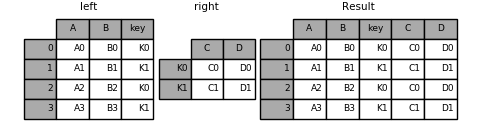


In [16]:
data = threshold_data.join(exposure_data, on=['animal'])
data

,animal,ear,threshold,abr_date,exposure_date,exposure_level
0,Subject 1,left,40.0,2016-12-24,2016-12-27,110
1,Subject 1,right,30.0,2016-12-24,2016-12-27,110
2,Subject 1,left,35.0,2017-01-10,2016-12-27,110
...,...,...,...,...,...,...
187,Subject 38,right,45.0,2015-09-25,2015-09-28,110
188,Subject 38,left,55.0,2015-09-29,2015-09-28,110
189,Subject 38,left,35.0,2015-10-12,2015-09-28,110


Recall that one of the first things we did was load the data using a function called `pd.read_csv`. This function was made available via the pandas module (which we imported as `pd`). Therefore, we can call it using the form:

    module_name.function_name(parameters)

Programming languages consist of data structures and functions. Data structures store data. Functions perform actions on data. Data structures in Python are known as *objects*. Some functions are stand-alone while others are associated with objects. Functions associated with objects are known as *methods*.

Methods are no different than other functions in principle. Objects are designed to help programmers group together related data and functions. We use methods by writing the object's name with a period, followed by the method's name, and any parameters passed to the method in paratheses. Thus, methods are in the form:

    object_name.method_name(parameters)

You can press tab after the period and a list will pop up with the methods associated with that particular object.

## Calculating ABR threshold shift

The next step is to compute when the ABR threshold was measured relative to the exposure. We can do this by subtracting the date of the ABR (stored in the `date` column) from the exposure date (stored in the `exposure_date` column) and saving it as a new column, `days_re_exposure`. 

### Exercise 7 - Calculating differences between dates

Yes, it's as simple as subtracting the two columns. Go ahead and try it. Hint, to create a new column:

    dataframe[column_name] = new_column_data

In [17]:
# Answer
data['days_re_exposure'] = data['abr_date'] - data['exposure_date']
data

,animal,ear,threshold,abr_date,exposure_date,exposure_level,days_re_exposure
0,Subject 1,left,40.0,2016-12-24,2016-12-27,110,-3 days
1,Subject 1,right,30.0,2016-12-24,2016-12-27,110,-3 days
2,Subject 1,left,35.0,2017-01-10,2016-12-27,110,14 days
...,...,...,...,...,...,...,...
187,Subject 38,right,45.0,2015-09-25,2015-09-28,110,-3 days
188,Subject 38,left,55.0,2015-09-29,2015-09-28,110,1 days
189,Subject 38,left,35.0,2015-10-12,2015-09-28,110,14 days


Nice. This is one of the advantages of making sure all your dates are represented properly in Python. It makes date math easy.

Next, we want to calculate the mean threshold for each exposure level before, one day after and 14 days after noise exposure. Pandas makes this easy with the `groupby` method. The method takes a list of columns to group by. Here, we only have one column which we're grouping by to start with.

In [18]:
grouping = data.groupby(['days_re_exposure'])
grouping

You now have a `DataFrameGroupBy` object that remembers how you grouped the data. You can now perform a variety of operations on this grouped data using methods offered by this particular object. For exampe, you can take the mean across all columns.

In [19]:
grouping.mean()

,threshold,exposure_level
days_re_exposure,,
-3 days,36.176471,110.131579
1 days,61.800000,110.240000
14 days,41.854839,110.625000


Note that we are missing a bunch of columns. The original dataframe had `animal`, `ear`, `abr_date` and `exposure_date`. Why are they missing?

Typically you just want the mean of a particular column.  You can specify the column you wish to use with the syntax:

    variable_name[column_name].mean()

In [20]:
grouping['threshold'].mean()

days_re_exposure
-3 days    36.176471
1 days     61.800000
14 days    41.854839
Name: threshold, dtype: float64

Is the result above a series or dataframe?

### Exercise 8 - Calculating means on grouped data

We'd like to modify the groupby operation so we can calcuate the mean threshold for each exposure level and timepoint (-3, 1, and 14 days re. exposure). Go ahead and try it.

In [21]:
# Answer
grouping = data.groupby(['exposure_level', 'days_re_exposure'])
mean_thresholds = grouping['threshold'].mean()
mean_thresholds

exposure_level  days_re_exposure
104             -3 days             31.666667
                1 days              51.666667
                14 days             39.166667
                                      ...    
114             -3 days             36.666667
                1 days              63.750000
                14 days             39.722222
Name: threshold, Length: 9, dtype: float64

What format is the data in? Dataframe or series? Note that the index has two levels, `exposure_level` and `days_re_exposure`. This is the first time we've encountered a `MultiIndex`. We'll cover these types of indices in more detail next week.

Now that we've calculated the group means, we want to plot the data. Fortunately, Pandas comes with a bunch of built-in plotting methods that makes life easy. Let's go ahead and try them!

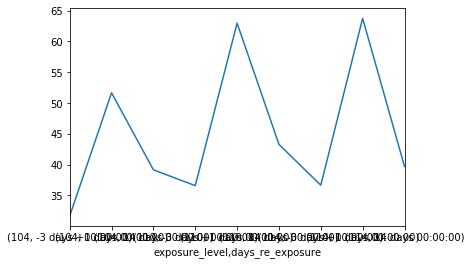

In [22]:
mean_thresholds.plot()

That's not really a very informative plot. We probably want a plot that plots the mean threshold for each `days_re_exposure` with a separate line for each `exposure_level`. How can we figure out what we need to do? The reason why we are getting the plot above is because Pandas, by default, uses the index labels as the x-values and creates a separate line for each column. So, somehow we need to create a separate column for each exposure level. Fortunately, that's really easy to do in Pandas using the `unstack` method, which takes a level of a `MultiIndex` and turns it into columns.

In [23]:
mean_thresholds_unstacked = mean_thresholds.unstack('exposure_level')
mean_thresholds_unstacked

exposure_level,104,110,114
days_re_exposure,,,
-3 days,31.666667,36.590909,36.666667
1 days,51.666667,62.968750,63.750000
14 days,39.166667,43.289474,39.722222


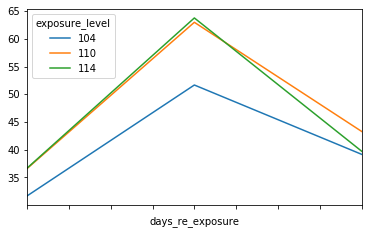

In [24]:
ax = mean_thresholds_unstacked.plot()

### Exercise 9 - Making a bar plot
Looks much better. What if we want to make it a bar plot? What do we need to do? Remember how to look up the documentation for a function?

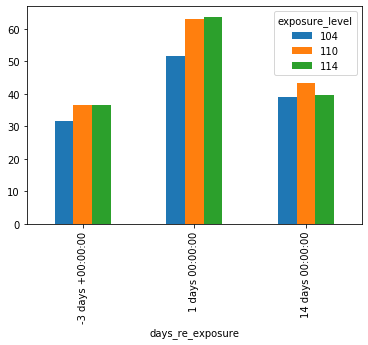

In [25]:
# Answer
ax = mean_thresholds_unstacked.plot(kind='bar')

Now, we'd like to add some error bars indicating the SEM. To do this, we need to first calculate the SEM for each group. Let's go back to the groupby object we made (`grouping`).

In [26]:
grouping

Another feature of IPython is that you can look up what types of methods an object has by putting a dot after the variable and hitting the tab key:
    
    variable_name.<tab>
    
Go ahead and try it with `grouping`.

Now, scroll through the list that pops up. Does anything sound like a good candidate for calculating the SEM? How can you verify that it, indeed, will do what you want?

### Exercise 10 - Calculating SEM

Great, now calculate the SEM for each `exposure_level` and `days_re_exposure` group. Be sure to reshape the result so that each exposure level is a separate column (i.e., the shape should match that of `mean_thresholds_unstacked`).

In [27]:
# Answer
sem_thresholds = grouping['threshold'].sem()
sem_thresholds_unstacked = sem_thresholds.unstack('exposure_level')
sem_thresholds_unstacked

exposure_level,104,110,114
days_re_exposure,,,
-3 days,1.666667,0.972300,2.800560
1 days,4.409586,2.043619,3.542224
14 days,2.006932,1.451887,2.156925


### Exercise 11 - Adding errorbars

Since we were careful to ensure that our `sem_thresholds_unstacked` dataframe has an identical index and set of columns as `mean_thresholds_unstacked`, it becomes much easier to add the errorbars using the built-in plotting functionality of Pandas. Go back to the `plot` method you used. Look at the documentation. Is there any way we can pass in the errorbar information to the plotting method? If so, go ahead and try it.

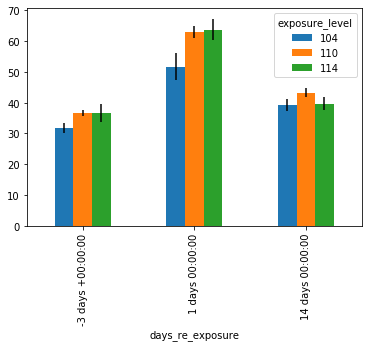

In [28]:
# Answer
ax = mean_thresholds_unstacked.plot(kind='bar', yerr=sem_thresholds_unstacked)

### Exercise 12 - Formatting plots

Now, let's fix the X and Y axes. The `plot` method returned what's known as an axes object. This object represents the plot you just generated. Check to see if thre are any useful methods on this object that allow you to set the y and x axes label as well as the x ticklabels. Since there are a ton of methods available, skip ahead to the ones that begin with `set`. You can quickly filter the list by entering the first few letters of the method name you're looking for then hitting `<tab>`:

    ax.set<tab>
    
We'd like to set the x-axis label to "Days re. exposure" and the y-axis label to "Threshold (dB SPL)". The tick labels may also look a bit better if they were simply '-3', '1' and '14'.

[Text(0, 0, '-3'), Text(0, 0, '1'), Text(0, 0, '14')]

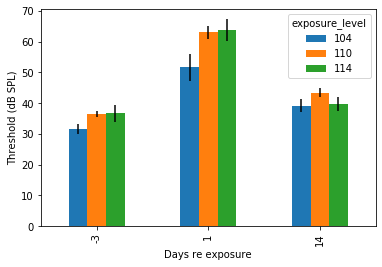

In [29]:
# Answer
ax = mean_thresholds_unstacked.plot(kind='bar', yerr=sem_thresholds_unstacked)
ax.set_xlabel('Days re exposure')
ax.set_ylabel('Threshold (dB SPL)')
ax.set_xticklabels(['-3', '1', '14'])